<a href="https://colab.research.google.com/github/ONITSOWN/course/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [9]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_excel('/content/drive/My Drive/data.xlsx')
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 n

In [10]:
data.head(5)

,Номер заказа,Канал продаж,Продуктовый сегмент,Менеджер,Название заказа,Продавец,Город,"Продажи факт, тыс.руб","Продажи план, тыс.руб",Дата сделки,Дата оплаты,Дней между сделкой и оплатой,Статус
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15,Закрыто
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,,В процессе
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04,1,Закрыто
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15,87,Закрыто


# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [11]:
data.columns

Index(['Номер заказа', 'Канал продаж', 'Продуктовый сегмент', 'Менеджер',
       'Название заказа', 'Продавец', 'Город', 'Продажи факт, тыс.руб',
       'Продажи план, тыс.руб', 'Дата сделки', 'Дата оплаты',
       'Дней между сделкой и оплатой', 'Статус'],
      dtype='object')

In [12]:
new_columns = []
for column in data.columns:
    new_columns.append(column.lower().replace(' ', '_'))
data.columns = new_columns

In [13]:
data.rename(columns = {'продажи_факт,_тыс.руб' : 'продажи_факт_тыс.руб', 'продажи_план,_тыс.руб' : 'продажи_план_тыс.руб'}, inplace = True)

In [14]:
data.columns

Index(['номер_заказа', 'канал_продаж', 'продуктовый_сегмент', 'менеджер',
       'название_заказа', 'продавец', 'город', 'продажи_факт_тыс.руб',
       'продажи_план_тыс.руб', 'дата_сделки', 'дата_оплаты',
       'дней_между_сделкой_и_оплатой', 'статус'],
      dtype='object')

Проверка на пропущенные значения

In [15]:
data.isna().sum()

,0
номер_заказа,0
канал_продаж,0
продуктовый_сегмент,0
менеджер,0
название_заказа,0
продавец,0
город,0
продажи_факт_тыс.руб,0
продажи_план_тыс.руб,0
дата_сделки,0


In [16]:
data['дата_оплаты'] = data['дата_оплаты'].fillna('0000-00-00')

Замена типов данных. После заполнения пропущенных значений в столбце "дата оплаты" его тип данных изменился. Необходимо привести его обратно к формату даты, чтобы можно было выполнять операции, соответствующие этому типу, например, анализировать промежуточные результаты. Также следует изменить тип данных в столбце "дней_между_сделкой_и_оплатой", чтобы обеспечить возможность выполнения математических операций с его значениями.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   номер_заказа                  116 non-null    int64         
 1   канал_продаж                  116 non-null    object        
 2   продуктовый_сегмент           116 non-null    object        
 3   менеджер                      116 non-null    object        
 4   название_заказа               116 non-null    object        
 5   продавец                      116 non-null    object        
 6   город                         116 non-null    object        
 7   продажи_факт_тыс.руб          116 non-null    int64         
 8   продажи_план_тыс.руб          116 non-null    int64         
 9   дата_сделки                   116 non-null    datetime64[ns]
 10  дата_оплаты                   116 non-null    object        
 11  дней_между_сделкой_и_оплатой  11

In [18]:
data['дата_оплаты'] = pd.to_datetime(data['дата_оплаты'], errors = 'coerce')
data['дней_между_сделкой_и_оплатой'] = pd.to_numeric(data['дней_между_сделкой_и_оплатой'], errors = 'coerce')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   номер_заказа                  116 non-null    int64         
 1   канал_продаж                  116 non-null    object        
 2   продуктовый_сегмент           116 non-null    object        
 3   менеджер                      116 non-null    object        
 4   название_заказа               116 non-null    object        
 5   продавец                      116 non-null    object        
 6   город                         116 non-null    object        
 7   продажи_факт_тыс.руб          116 non-null    int64         
 8   продажи_план_тыс.руб          116 non-null    int64         
 9   дата_сделки                   116 non-null    datetime64[ns]
 10  дата_оплаты                   93 non-null     datetime64[ns]
 11  дней_между_сделкой_и_оплатой  93

Подсчет суммарных фактических продаж по каждому городу

In [20]:
data['суммарные_фактические_продажи'] = data.groupby('город')['продажи_факт_тыс.руб'].transform('sum')

In [21]:
data.head(5)

,номер_заказа,канал_продаж,продуктовый_сегмент,менеджер,название_заказа,продавец,город,продажи_факт_тыс.руб,продажи_план_тыс.руб,дата_сделки,дата_оплаты,дней_между_сделкой_и_оплатой,статус,суммарные_фактические_продажи
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52.0,Закрыто,1370
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15.0,Закрыто,1370
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,NaN,В процессе,1370
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04,1.0,Закрыто,1370
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15,87.0,Закрыто,7680


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Динамика выполнения плана по месяцам. Таблица была сгруппирована по месяцу и фактической прибыли, с добавлением столбца "выполнение плана", чтобы определить, достигнут ли план по продажам в каждом месяце (0 - не выполнен, 1 - выполнен). Анализ показал, что максимальная прибыль была получена в январе, но в апреле и июне наблюдаются значительные снижения, превышающие 50 тысяч рублей, а в августе сделок не было совсем. В остальные месяцы года продажи не превышают одного миллиона рублей. При этом выполнение плана ухудшается с каждым месяцем, и планы часто остаются невыполненными.

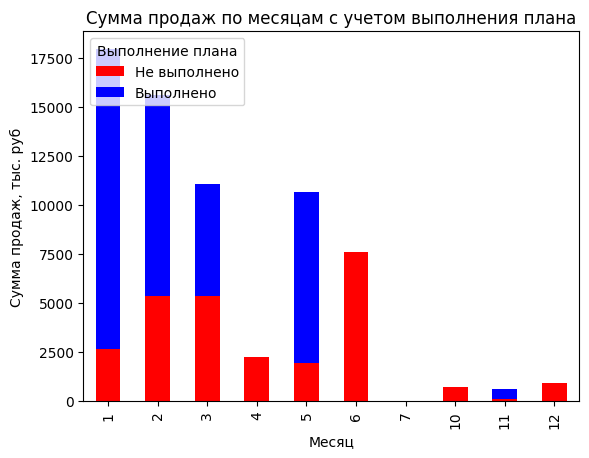

In [33]:
import matplotlib.pyplot as plt
data['выполнение_плана'] = (data['продажи_факт_тыс.руб'] >= data['продажи_план_тыс.руб']).astype(int)

monthly_sales = data.groupby([data['дата_сделки'].dt.month, 'выполнение_плана'])['продажи_факт_тыс.руб'].sum()

colors = ['red', 'blue']
monthly_sales.unstack().plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Месяц')
plt.ylabel('Сумма продаж, тыс. руб')
plt.title('Сумма продаж по месяцам с учетом выполнения плана')
plt.legend(title='Выполнение плана', labels=['Не выполнено', 'Выполнено'], loc='upper left')
plt.show()


Продажи по категориям товаров. Сортировка данных показала, что основную часть дохода приносят товары из категории "Оборудование" и "Другое". Наименьший доход (или его отсутствие) зафиксирован для таких категорий, как игрушки, косметика и "Охота и рыбалка", где продажи равны нулю.

In [23]:
product_sales = data.groupby('продуктовый_сегмент')['продажи_факт_тыс.руб'].sum()
product_sales.sort_values(ascending=False)

,продажи_факт_тыс.руб
продуктовый_сегмент,
Оборудование,35099
Другое,7225
Свет,6950
Ткань и аксессуары,5712
Одежда,4650
Электронные устройства,2130
Бассейн,1500
Сувениры,970
Спорт товары,750


Категории с наибольшими суммарными продажами и их динамика по месяцам. Товары из категории "Другое" лидируют в первые месяцы года, однако их продажи постепенно снижаются. Аналогичная ситуация наблюдается с категорией "Одежда", которая после июня перестает продаваться вовсе. В то же время, товары категории "Свет" демонстрируют положительную динамику и занимают все более высокие позиции с каждым месяцем.

In [24]:
top_segments = product_sales.nlargest(5)

In [25]:
top_segments_sales = data[data['продуктовый_сегмент'].isin(top_segments .index)]
monthly_sales_top_segments = top_segments_sales.groupby([top_segments_sales['дата_оплаты'].dt.month, 'продуктовый_сегмент'])['продажи_факт_тыс.руб'].sum()

In [26]:
monthly_sales_top_segments_sorted = monthly_sales_top_segments.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))
monthly_sales_top_segments_sorted

дата_оплаты  продуктовый_сегмент
1.0          Одежда                  3900
             Другое                  1250
             Оборудование            1090
             Ткань и аксессуары       760
2.0          Оборудование            6114
             Другое                  4525
             Свет                     200
             Ткань и аксессуары       180
3.0          Оборудование            5560
             Свет                    4300
             Ткань и аксессуары      2780
             Одежда                   300
             Другое                   250
4.0          Оборудование            5055
             Другое                  1200
             Ткань и аксессуары      1062
             Свет                     700
5.0          Свет                    1750
             Ткань и аксессуары       930
             Одежда                   450
6.0          Оборудование           17280
Name: продажи_факт_тыс.руб, dtype: int64

География продаж. Наибольший объем продаж зафиксирован в Челябинске и Казани. В таких городах, как Севастополь, Ставрополь, Липецк и Ярославль, продажи отсутствуют.

In [27]:
city_sales = data.groupby('город')['продажи_факт_тыс.руб'].sum().sort_values(ascending=False)
city_sales

,продажи_факт_тыс.руб
город,
Челябинск,8700
Казань,8040
Магнитогорск,7680
Сочи,6950
Новосибирск,5725
Самара,5574
Уфа,4350
Волгоград,4250
Москва,3717


Сравнение выполнения плана по каналам продаж. Наиболее успешные каналы с точки зрения выполнения плана – это "Холодный звонок" и "Рекомендация". С небольшим отставанием идут каналы "Выставка" и "Почта". В то же время, планы не выполняются по каналам "Вебсайт" и "Контекстная реклама". Канал "Рекомендация" показывает конверсию выше 1, что указывает на превышение фактических продаж над плановыми. Каналы "Почта", "Вебсайт" и "Контекстная реклама" демонстрируют низкую конверсию. Средняя длительность сделки наиболее высока для каналов "Почта" (57 дней) и "Холодный звонок" (44 дня), тогда как канал "Выставка" характеризуется одной из самых коротких средних длительностей сделки – около 9 дней.

In [28]:
plan_completion_by_channel = data.groupby('канал_продаж')['выполнение_плана'].mean().sort_values(ascending=False)
plan_completion_by_channel

,выполнение_плана
канал_продаж,
Холодный звонок,0.363636
Рекомендация,0.343750
Выставка,0.277778
Почта,0.250000
Вебсайт,0.000000
Контекстная реклама,0.000000


In [29]:
conversion_by_channel = data.groupby('канал_продаж').apply(lambda x: x['продажи_факт_тыс.руб'].sum() / x['продажи_план_тыс.руб'].sum()).sort_values(ascending=False)
conversion_by_channel


<ipython-input-29-14866ba259cb>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_by_channel = data.groupby('канал_продаж').apply(lambda x: x['продажи_факт_тыс.руб'].sum() / x['продажи_план_тыс.руб'].sum()).sort_values(ascending=False)


,0
канал_продаж,
Рекомендация,1.060882
Выставка,0.806873
Холодный звонок,0.806769
Почта,0.442857
Вебсайт,0.400000
Контекстная реклама,0.350000


In [30]:
deal_duration_by_channel = data.groupby('канал_продаж')['дней_между_сделкой_и_оплатой'].mean().sort_values(ascending=False)
deal_duration_by_channel

,дней_между_сделкой_и_оплатой
канал_продаж,
Почта,57.000000
Холодный звонок,44.033333
Контекстная реклама,29.800000
Рекомендация,26.440000
Вебсайт,20.000000
Выставка,9.214286


# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

Рекомендуется проводить профилирование менеджеров по категориям товаров и каналам продаж, в которых они демонстрируют наилучшие результаты. Например, если менеджер успешно завершает сделки в категории "Оборудование" или через канал "Холодный звонок", имеет смысл назначать ему больше задач в этих направлениях. Такой подход может повысить прибыльность и ускорить процесс заключения сделок.

Также стоит обратить внимание на расширение работы в наиболее прибыльных каналах продаж, таких как "Холодный звонок" и "Рекомендация", где выполнение планов происходит наиболее часто.

Необходимо учитывать регионы с высоким спросом, такие как Челябинск и Казань, и проанализировать возможность увеличения доли продаж в этих городах.
